In [32]:
import pyaudio
import wave
import datetime
from pvrecorder import PvRecorder


In [33]:
# Find Available Microphones
print("Avalible Audio Input")
devices = PvRecorder.get_available_devices()
for device_index in range(len(devices)):
    print(f"CH[{device_index}] : {devices[device_index]}")  


Avalible Audio Input
CH[0] : Panya-iPhone Microphone
CH[1] : USB Audio
CH[2] : Scarlett 2i2 USB
CH[3] : HyperX SoloCast
CH[4] : C922 Pro Stream Webcam
CH[5] : MacBook Air Microphone
CH[6] : Microsoft Teams Audio
CH[7] : ZoomAudioDevice


In [34]:
chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 4

p = pyaudio.PyAudio()  # Create an interface to PortAudio

In [35]:

print('Recording')
stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

Recording
Finished recording


In [36]:
# Save the recorded data as a WAV file
WaveFileName = "AudioOutput/Capture-" + str(datetime.datetime.now()) + ".wav"  

wf = wave.open(WaveFileName, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

File Audio Test: AudioOutput/Capture-2024-09-21 00:31:10.838879.wav


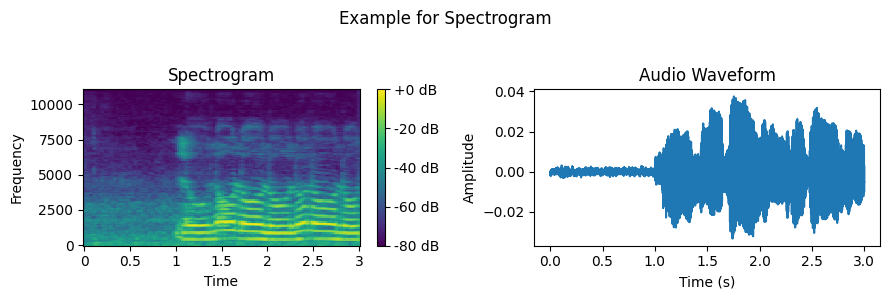

In [37]:
# playblack Recorde Audio
import os
import librosa # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from IPython.display import Audio # type: ignore
from scipy.signal import butter, lfilter # type: ignore

audio_path = WaveFileName
print("File Audio Test: " + audio_path)
#audio_path = "/Users/panya/Project-ALL/DroneClassification/AcousticDroneDetection/TestAudio/No_Drone/Natural_3-14-ex57.wav"
y, sample_rate = librosa.load(audio_path, duration=3)  # Load audio and limit to 3 seconds


# convert to spectrogram 
spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Plot Spectrogram
plt.figure(figsize=(9, 3))
plt.suptitle(f'Example for Spectrogram')
plt.subplot(1, 2, 1)
plt.title(f'Spectrogram')
librosa.display.specshow(spectrogram, x_axis='time', y_axis='hz',cmap='viridis')  #cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title(f'Audio Waveform')
plt.plot(np.linspace(0, len(y) / sample_rate, len(y)), y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio(data=y, rate=sample_rate)